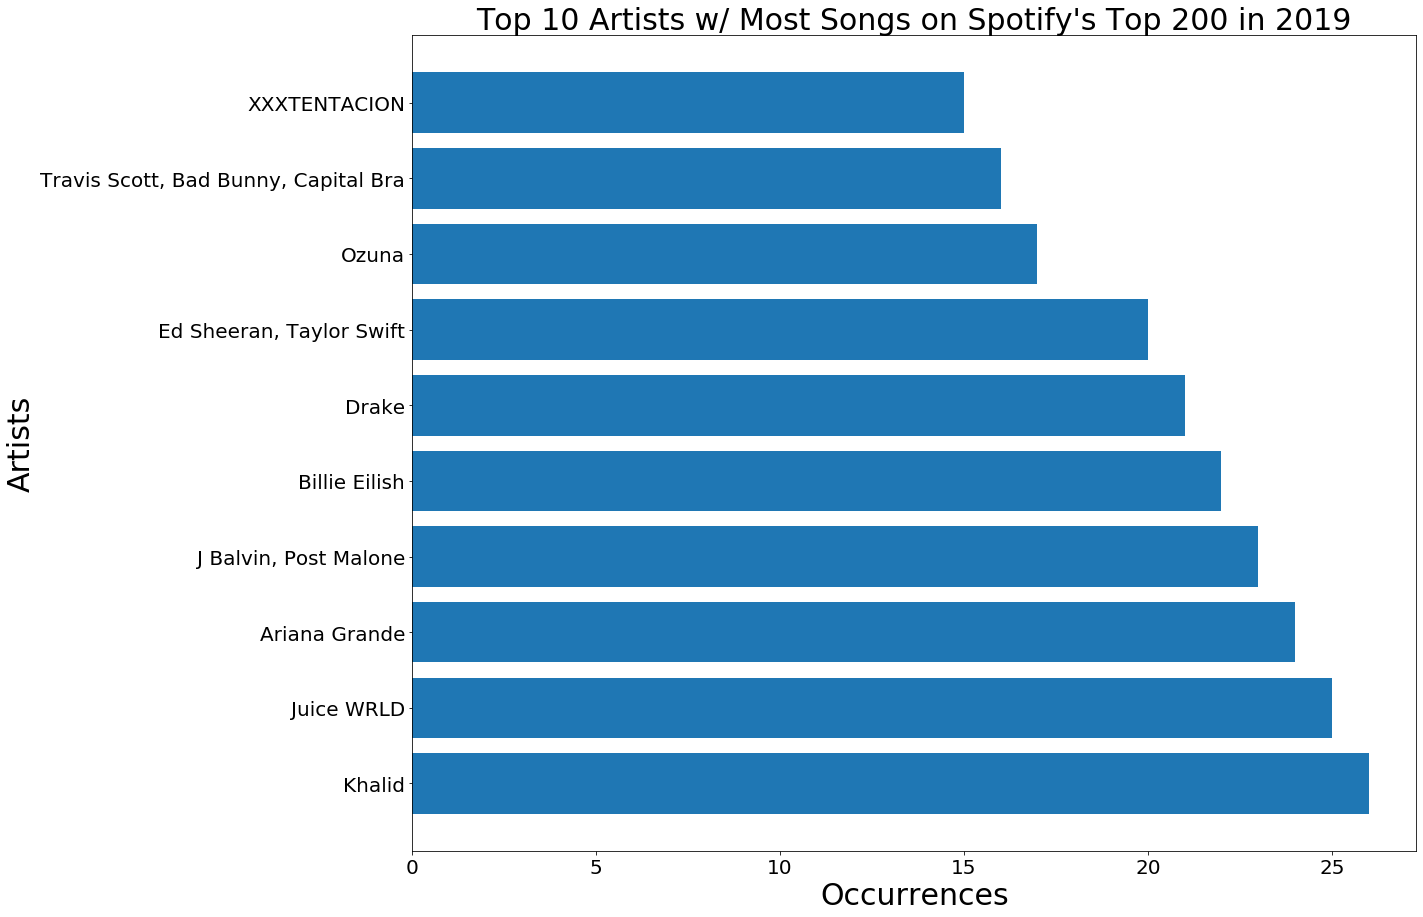

In [152]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

top_df = pd.read_csv('t200_unique_streams.csv')
artists_dict = {}
for names_string in top_df['featured-artist']:
    if (pd.isnull(names_string) == False):
        names_lst = names_string.split(',')
        for name in names_lst:
            if name in artists_dict:
                artists_dict[name] += 1
            else:
                artists_dict[name] = 1
for name in top_df['Artist']:
    if name in artists_dict:
        artists_dict[name] += 1
    else:
        artists_dict[name] = 1
        
def top_n(d, n):
    dct = defaultdict(list) 
    for k, v in d.items():
        dct[v].append(k)      
    return sorted(dct.items())[-n:][::-1]
top_10_lst = top_n(artists_dict, 10)
t10_names = []
t10_freq = []
for tup in top_10_lst:
    t1 = ', '.join(tup[1])
    t10_names.append(str(t1))
    t10_freq.append(tup[0])

t10_df = pd.DataFrame(list(zip(t10_freq, t10_names)),columns =['Frequency', 'Artists']) 

label_locations = np.arange(t10_df.shape[0])
plt.barh(t10_df['Artists'], t10_df['Frequency'])
plt.title('Top 10 Artists w/ Most Songs on Spotify\'s Top 200 in 2019', fontsize = 30)
plt.ylabel('Artists', fontsize = 30)
plt.xlabel('Occurrences', fontsize = 30)
plt.gcf().set_size_inches(18, 15)
plt.savefig('t10_artists.png', bbox_inches = "tight")